In [30]:
import pandas as pd
import numpy as np

In [31]:
df = df

In [32]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [33]:
df.shape

(20800, 5)

### Null values

In [34]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [35]:
# Dropping all the nan values

## Feature Engineering

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
df = df.dropna()

In [38]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [39]:
messages = df.copy()

In [40]:
# Resetting index as we drop some of the rows

messages.reset_index(inplace = True)

In [41]:
messages.head(8)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


### Clean Dataset

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]',' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [43]:
corpus[3]

'civilian kill singl us airstrik identifi'

##  Applying CountVectorizer 

In [44]:
# Create the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 5000, ngram_range= (1,3))
X = cv.fit_transform(corpus).toarray()

In [45]:
X.shape

(18285, 5000)

In [46]:
y = messages['label']

In [47]:
## Dividing the dataset into Train and Test

In [48]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [50]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [51]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [53]:
count_df = pd.DataFrame(X_train, columns = cv.get_feature_names())

In [55]:
count_df

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12794,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
import matplotlib.pyplot as plt

In [61]:
# function to plot confusion matrix

def plot_confusion_matrix(cm, classes, normalize = False, 
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
  
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  thresh = cm.max() / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j],
             horizontalalignment = 'center',
             color = 'white' if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')

## MultinomialNB Algorithm

In [62]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [63]:
from sklearn import metrics
import itertools

accuracy: 0.902
Confusion matrix, without normalization


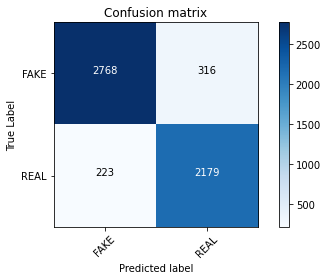

In [64]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)

plot_confusion_matrix(cm, classes = ['FAKE','REAL'])

In [70]:
from sklearn import metrics

In [71]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9017499088589136

In [72]:
y_train.shape

(12799,)

## Multinomial Classifier with Hyperparamter

In [76]:
classifier = MultinomialNB(alpha = 0.1)

In [83]:
previous_score = 0

for alpha in np.arange(0,1,0.1):
  sub_classifier = MultinomialNB(alpha = alpha)
  sub_classifier.fit(X_train, y_train)
  y_pred = sub_classifier.predict(X_test)
  score = metrics.accuracy_score(y_test, y_pred)

  if score > previous_score:
    classifier = sub_classifier
  
  print('--' * 30)
  print("Alpha: {}, score: {}".format(alpha, score))


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


------------------------------------------------------------
Alpha: 0.0, score: 0.8904484141450966
------------------------------------------------------------
Alpha: 0.1, score: 0.9030258840685381
------------------------------------------------------------
Alpha: 0.2, score: 0.9030258840685381
------------------------------------------------------------
Alpha: 0.30000000000000004, score: 0.9026613197229311
------------------------------------------------------------
Alpha: 0.4, score: 0.9019321910317171
------------------------------------------------------------
Alpha: 0.5, score: 0.9024790375501276
------------------------------------------------------------
Alpha: 0.6000000000000001, score: 0.9028436018957346
------------------------------------------------------------
Alpha: 0.7000000000000001, score: 0.9035727305869486
------------------------------------------------------------
Alpha: 0.8, score: 0.9030258840685381
------------------------------------------------------------
Al

In [80]:
# Get Feature names

feature_names = cv.get_feature_names()

In [84]:
classifier.coef_[0]

array([ -9.13851551,  -8.66088795,  -9.13851551, ..., -10.83311123,
        -8.7962293 ,  -9.36677416])

In [85]:
## Most Real

sorted(zip(classifier.coef_[0], feature_names), reverse = True)[:20]

[(-3.9920894686099926, 'trump'),
 (-4.283778449404154, 'hillari'),
 (-4.375295545839294, 'clinton'),
 (-4.8873997935153906, 'elect'),
 (-5.144630412704637, 'new'),
 (-5.239226293337629, 'comment'),
 (-5.272857037363478, 'video'),
 (-5.400360096919867, 'war'),
 (-5.400360096919867, 'us'),
 (-5.400360096919867, 'hillari clinton'),
 (-5.434948525093684, 'fbi'),
 (-5.450146386003116, 'vote'),
 (-5.535349569997123, 'email'),
 (-5.592540682275724, 'world'),
 (-5.628494225203827, 'obama'),
 (-5.717782305845059, 'donald'),
 (-5.751706861626975, 'donald trump'),
 (-5.7656056260177895, 'russia'),
 (-5.868713801008469, 'day'),
 (-5.868713801008469, 'america')]

In [86]:
## Most Fake

sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.833111226611438, 'abe'),
 (-10.833111226611438, 'abroad'),
 (-10.833111226611438, 'abus new'),
 (-10.833111226611438, 'abus new york'),
 (-10.833111226611438, 'act new'),
 (-10.833111226611438, 'act new york'),
 (-10.833111226611438, 'advic'),
 (-10.833111226611438, 'advis new'),
 (-10.833111226611438, 'advis new york'),
 (-10.833111226611438, 'age new'),
 (-10.833111226611438, 'age new york'),
 (-10.833111226611438, 'agenda breitbart'),
 (-10.833111226611438, 'ail'),
 (-10.833111226611438, 'aleppo new'),
 (-10.833111226611438, 'aleppo new york'),
 (-10.833111226611438, 'ali'),
 (-10.833111226611438, 'america breitbart'),
 (-10.833111226611438, 'america new york'),
 (-10.833111226611438, 'american breitbart'),
 (-10.833111226611438, 'american new'),
 (-10.833111226611438, 'american new york'),
 (-10.833111226611438, 'ami'),
 (-10.833111226611438, 'ami schumer'),
 (-10.833111226611438, 'amp'),
 (-10.833111226611438, 'applaud'),
 (-10.833111226611438, 'arson'),
 (-10.83311122661143